In [1]:
import time
import hypergraph
import randomization
import matplotlib.pyplot as plt

In [2]:
#hypergraph_name = 'syn100'
hypergraph_name = 'syn1000'
H = hypergraph.read_hypergraph(hypergraph_name)

In [3]:
H.print_info()

Number of nodes: 1000
Number of hyperedges: 4996
Average degree of node: 15.992
Maximum degree of node: 86
Frequency distribution of node degree: {67: 1, 46: 1, 39: 1, 81: 1, 86: 1, 47: 1, 13: 86, 29: 4, 34: 2, 24: 10, 26: 3, 38: 3, 30: 1, 25: 14, 40: 2, 11: 67, 19: 45, 43: 1, 35: 1, 20: 47, 18: 73, 9: 41, 23: 20, 17: 70, 31: 1, 51: 1, 16: 115, 15: 114, 21: 27, 22: 28, 14: 87, 12: 67, 33: 1, 27: 3, 10: 35, 7: 5, 8: 17, 6: 2, 5: 1}
Average size of hyperedge: 3.200960768614892
Maximum size of hyperedge: 5
Frequency distribution of hyperedge size: {2: 1996, 3: 1000, 4: 1000, 5: 1000}
Hypergraph is connected: True



In [4]:
fontsize = 25
plt.rcParams["font.size"] = fontsize
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['xtick.major.size'] = 7.5
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['ytick.major.size'] = 7.5
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['hatch.linewidth'] = 0.2

# Plot function
def compare_properties(H: hypergraph.HyperGraph, randH: hypergraph.HyperGraph):
    
    fig = plt.figure(figsize=(12, 12))
    
    ### Node degree distribution
    H_dd = H.node_degree_distribution(func='survival')
    randH_dd = randH.node_degree_distribution(func='survival')
    ax1 = fig.add_subplot(2, 2, 1)
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax1.scatter(list(H_dd.keys()), list(H_dd.values()), color="tomato", linewidths=2, s=150, label="Original", marker='o', facecolor="None")
    ax1.scatter(list(randH_dd.keys()), list(randH_dd.values()), color="gray", linewidths=2, s=150, label="Randomized", marker='+')
    #ax1.set_xlim(left=0.5)
    #ax1.set_ylim(top=1.0)
    ax1.legend(loc='lower left', frameon=False, fontsize=20)
    ax1.set_title("Node degree distribution", fontsize=20)
    
    ### Average degree of nearest neighbors of nodes with degree k
    H_knn = H.average_degree_of_nearest_neighbors_of_nodes()
    randH_knn = randH.average_degree_of_nearest_neighbors_of_nodes()
    ax2 = fig.add_subplot(2, 2, 2)
    ax2.set_xscale('log')
    #ax2.set_yscale('log')
    ax2.scatter(list(H_knn.keys()), list(H_knn.values()), color="tomato", linewidths=2, s=150, label="Original", marker='o', facecolor="None")
    ax2.scatter(list(randH_knn.keys()), list(randH_knn.values()), color="gray", linewidths=2, s=150, label="Randomized", marker='+')
    #ax2.set_xlim(left=0.5)
    ax2.set_ylim(bottom=0, top=max(max(H_knn.values()), max(randH_knn.values()))*1.05)
    ax2.set_title("Average degree of nearest neighbors\nof nodes with degree k", fontsize=20)
    
    ### Degree-dependent redundancy coefficient of the node
    H_drc = H.degree_dependent_node_redundancy_coefficient()
    randH_drc = randH.degree_dependent_node_redundancy_coefficient()
    ax3 = fig.add_subplot(2, 2, 3)
    ax3.set_xscale('log')
    ax3.set_yscale('log')
    ax3.scatter(list(H_drc.keys()), list(H_drc.values()), color="tomato", linewidths=2, s=150, label="Original", marker='o', facecolor="None")
    ax3.scatter(list(randH_drc.keys()), list(randH_drc.values()), color="gray", linewidths=2, s=150, label="Randomized", marker='+')
    #ax3.set_xlim(left=0.5)
    #ax3.set_ylim(bottom=0, top=max(max(H_drc.values()), max(randH_drc.values()))*1.05)
    ax3.set_title("Degree-dependent redundancy\ncoefficient of the node", fontsize=20)
    
    ### Hyperedge size distribution
    H_hs = H.hyperedge_size_distribution(func='survival')
    randH_hs = randH.hyperedge_size_distribution(func='survival')
    ax4 = fig.add_subplot(2, 2, 4)
    ax4.set_xscale('log')
    ax4.set_yscale('log')
    ax4.scatter(list(H_hs.keys()), list(H_hs.values()), color="tomato", linewidths=2, s=150, label="Original", marker='o', facecolor="None")
    ax4.scatter(list(randH_hs.keys()), list(randH_hs.values()), color="gray", linewidths=2, s=150, label="Randomized", marker='+')
    ax4.set_title("Hyperedge size distribution", fontsize=20)
    
    #plt.legend(loc='upper center', bbox_to_anchor=(0, -.15), frameon=False, handletextpad=0.3, ncol=2)
    fig.tight_layout()
    plt.show()

Number of nodes 0.0
Number of hyperedges 0.0
Node degree distribution 0.232
Node degree correlation 0.4051315577592023
Node redundancy 0.9258730064311171
Hyperedge size distribution 0.6092874299439551
Elapsed time (sec):  0.07387399673461914


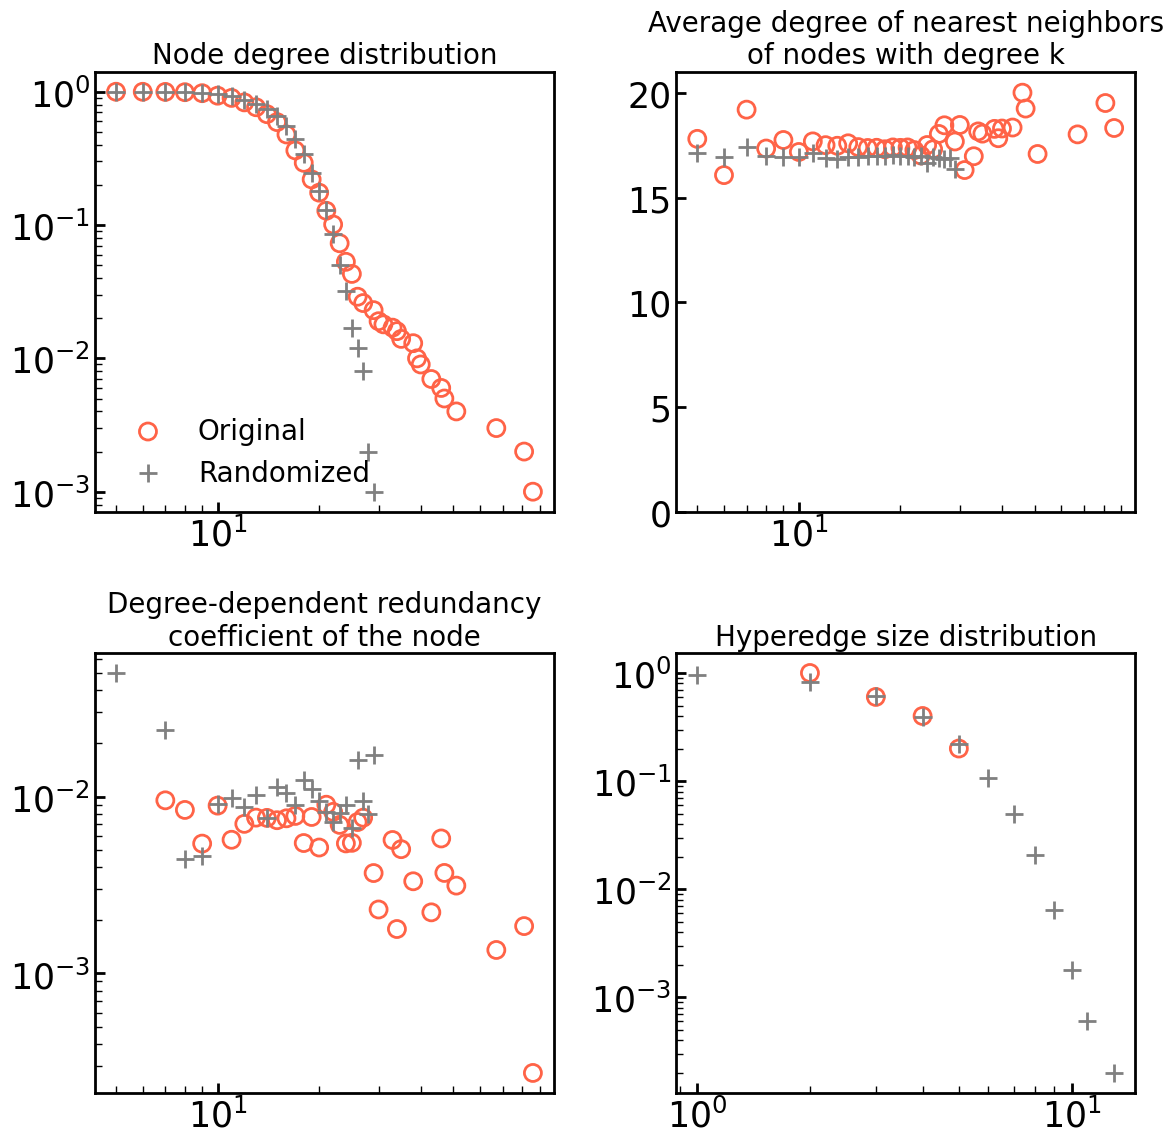

In [5]:
(d_v, d_e) = ("0", "0")
t_s = time.time()
randH = randomization.hyper_dk(H, d_v, d_e)
t_e = time.time()
randomization.write_randomized_hypergraph(randH, "rand", d_v, d_e)
dist = randomization.get_L1_distance(H, randH)
elapsed = t_e - t_s
randomization.write_randomized_hypergraph(randH, "randomized", d_v, d_e)

for prop in dist:
    print(prop, dist[prop])
    
print("Elapsed time (sec): ", elapsed)

compare_properties(H, randH)

Number of nodes 0.0
Number of hyperedges 0.0
Node degree distribution 0.0
Node degree correlation 0.16320655397486422
Node redundancy 1.2511224194442327
Hyperedge size distribution 0.6040832666132906
Elapsed time (sec):  0.022182941436767578


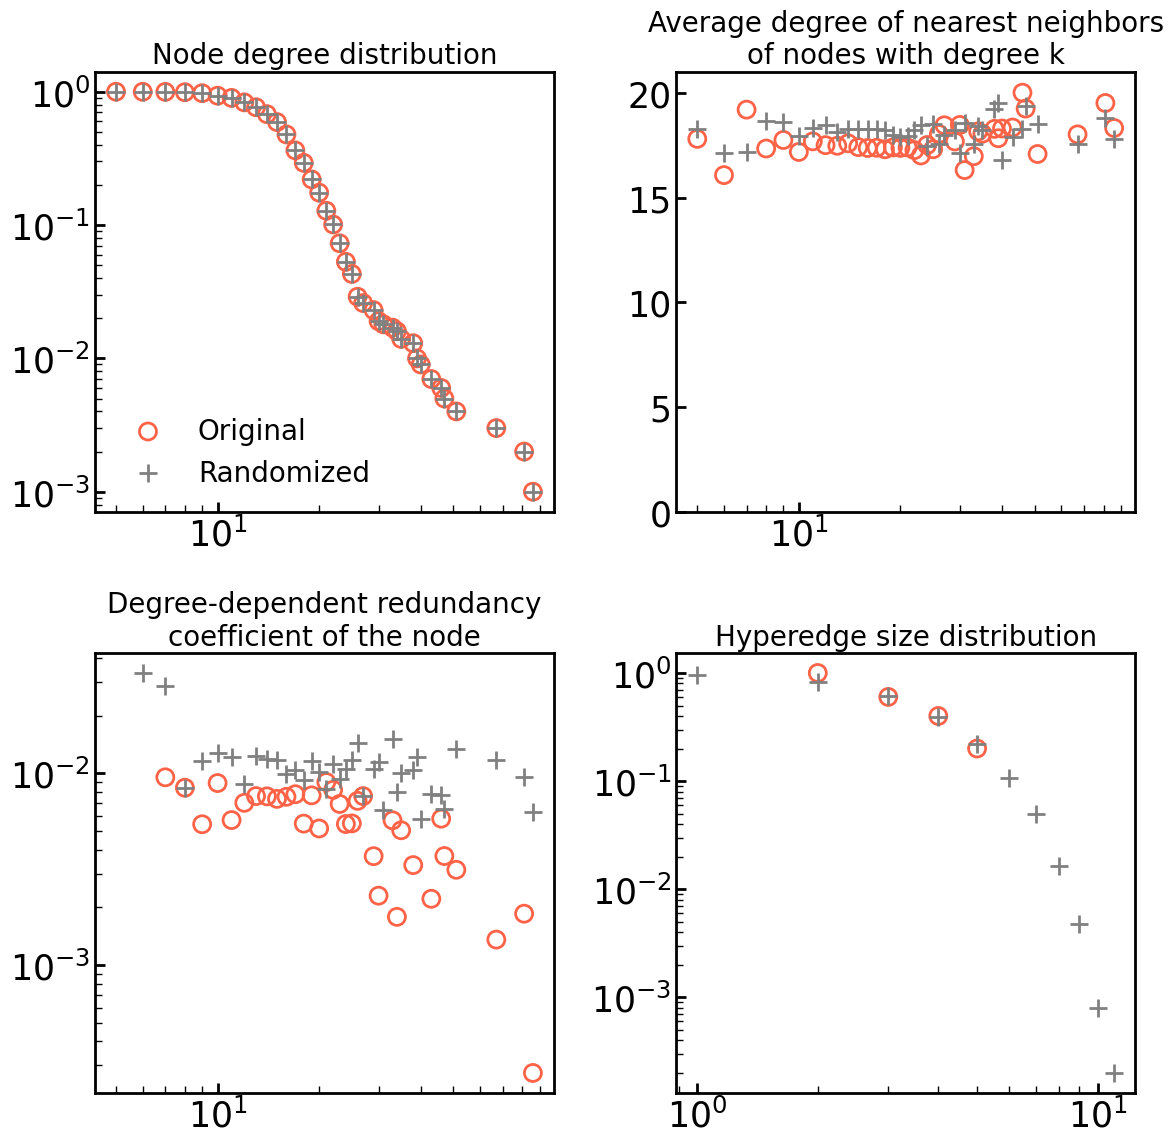

In [6]:
(d_v, d_e) = ("1", "0")
t_s = time.time()
randH = randomization.hyper_dk(H, d_v, d_e)
t_e = time.time()
randomization.write_randomized_hypergraph(randH, "rand", d_v, d_e)
dist = randomization.get_L1_distance(H, randH)
elapsed = t_e - t_s
randomization.write_randomized_hypergraph(randH, "randomized", d_v, d_e)

for prop in dist:
    print(prop, dist[prop])
    
print("Elapsed time (sec): ", elapsed)

compare_properties(H, randH)

Number of nodes 0.0
Number of hyperedges 0.0
Node degree distribution 0.0
Node degree correlation 0.006687158860923354
Node redundancy 0.7557590227335846
Hyperedge size distribution 0.5944755804643715
Elapsed time (sec):  29.38136100769043


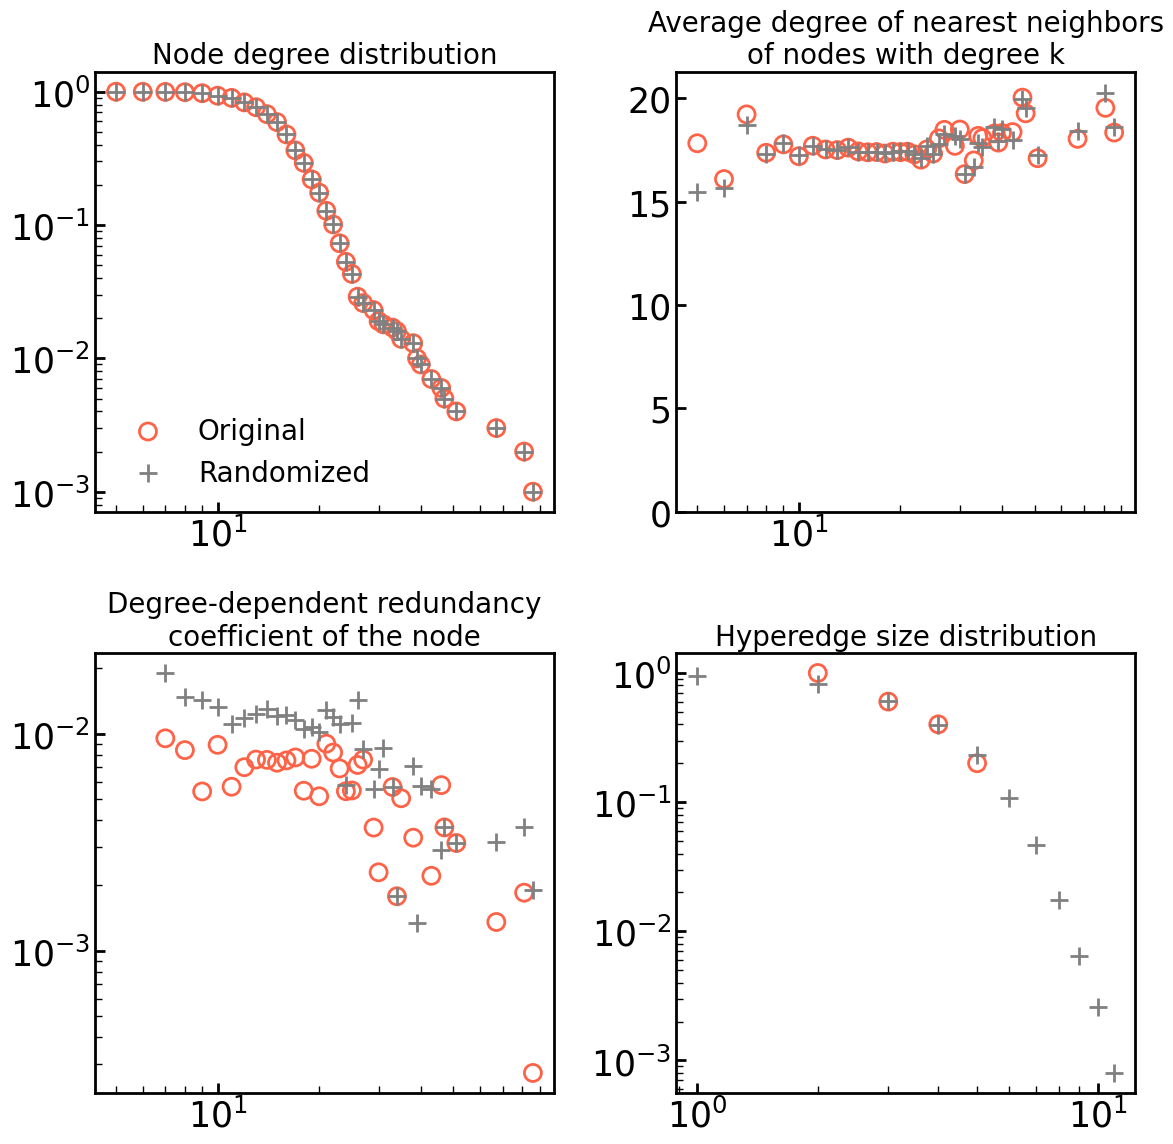

In [7]:
(d_v, d_e) = ("2", "0")
t_s = time.time()
randH = randomization.hyper_dk(H, d_v, d_e)
t_e = time.time()
randomization.write_randomized_hypergraph(randH, "rand", d_v, d_e)
dist = randomization.get_L1_distance(H, randH)
elapsed = t_e - t_s
randomization.write_randomized_hypergraph(randH, "randomized", d_v, d_e)

for prop in dist:
    print(prop, dist[prop])
    
print("Elapsed time (sec): ", elapsed)

compare_properties(H, randH)

Number of nodes 0.0
Number of hyperedges 0.0
Node degree distribution 0.0
Node degree correlation 0.006854927280249632
Node redundancy 0.00118877749124638
Hyperedge size distribution 0.6088871096877502
Elapsed time (sec):  67.79924869537354


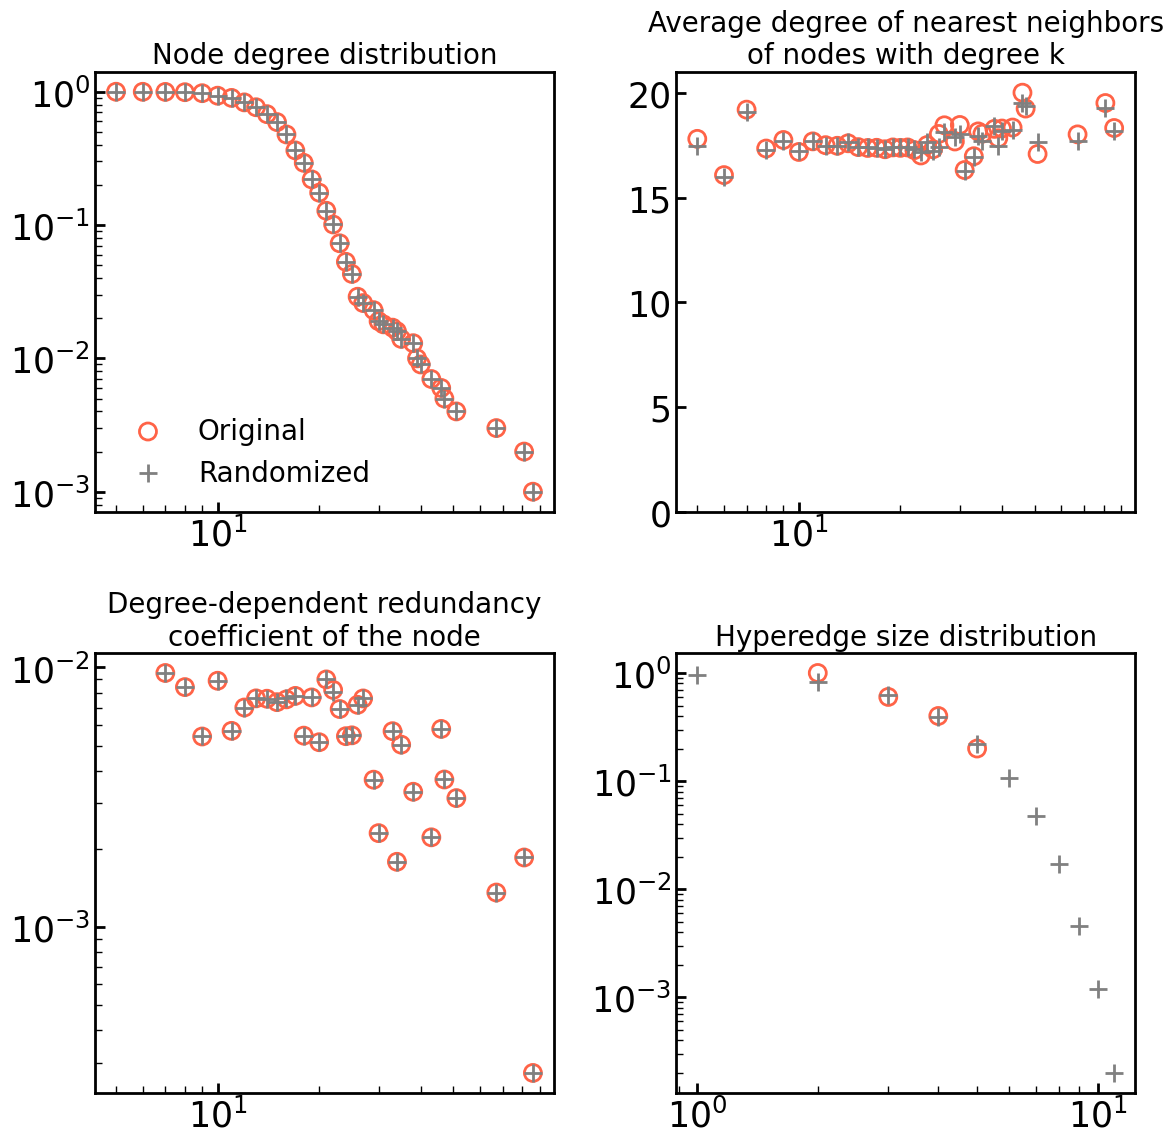

In [8]:
(d_v, d_e) = ("2.5", "0")
t_s = time.time()
randH = randomization.hyper_dk(H, d_v, d_e)
t_e = time.time()
randomization.write_randomized_hypergraph(randH, "rand", d_v, d_e)
dist = randomization.get_L1_distance(H, randH)
elapsed = t_e - t_s
randomization.write_randomized_hypergraph(randH, "randomized", d_v, d_e)

for prop in dist:
    print(prop, dist[prop])
    
print("Elapsed time (sec): ", elapsed)

compare_properties(H, randH)

Number of nodes 0.0
Number of hyperedges 0.0
Node degree distribution 0.27
Node degree correlation 0.44941893694037177
Node redundancy 0.4620159191586364
Hyperedge size distribution 0.0
Elapsed time (sec):  0.0825810432434082


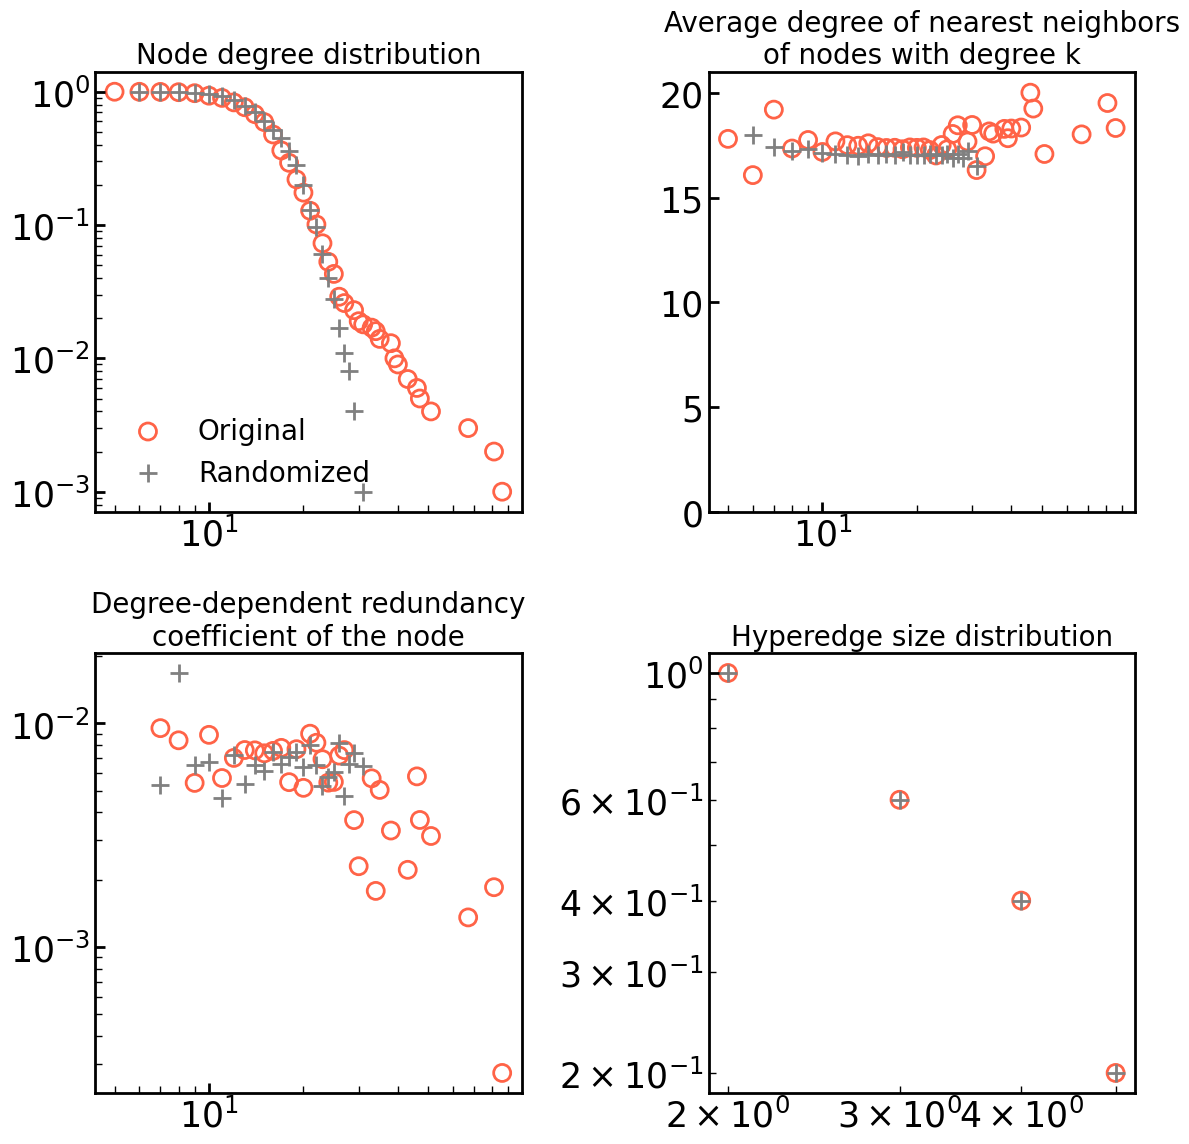

In [9]:
(d_v, d_e) = ("0", "1")
t_s = time.time()
randH = randomization.hyper_dk(H, d_v, d_e)
t_e = time.time()
randomization.write_randomized_hypergraph(randH, "rand", d_v, d_e)
dist = randomization.get_L1_distance(H, randH)
elapsed = t_e - t_s
randomization.write_randomized_hypergraph(randH, "randomized", d_v, d_e)

for prop in dist:
    print(prop, dist[prop])
    
print("Elapsed time (sec): ", elapsed)

compare_properties(H, randH)

Number of nodes 0.0
Number of hyperedges 0.0
Node degree distribution 0.0
Node degree correlation 0.17193751190703052
Node redundancy 0.5564126595747284
Hyperedge size distribution 0.0
Elapsed time (sec):  0.020128965377807617


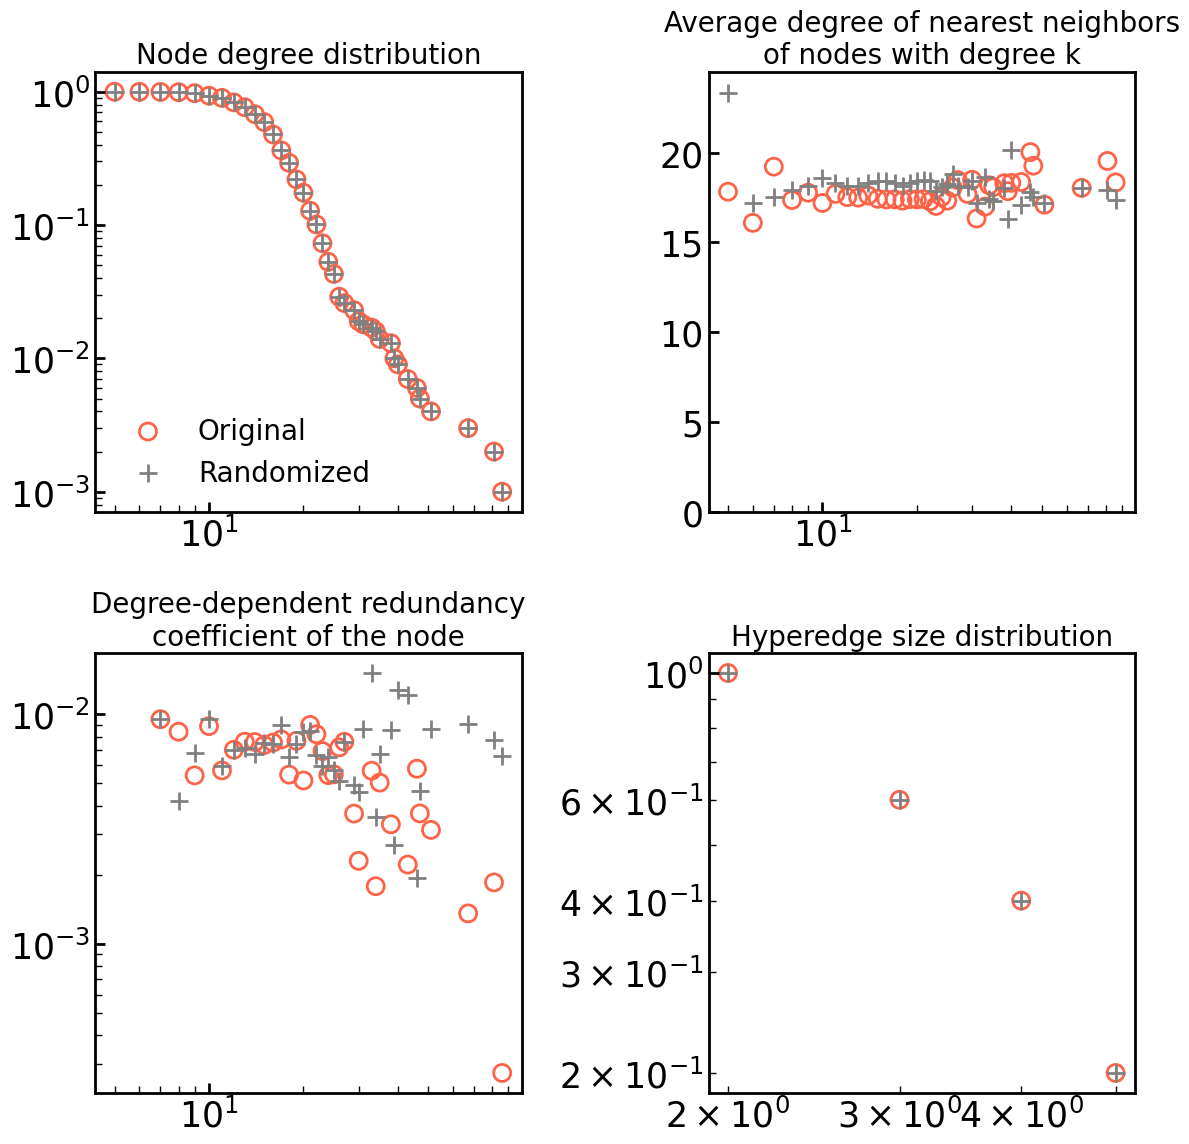

In [10]:
(d_v, d_e) = ("1", "1")
t_s = time.time()
randH = randomization.hyper_dk(H, d_v, d_e)
t_e = time.time()
randomization.write_randomized_hypergraph(randH, "rand", d_v, d_e)
dist = randomization.get_L1_distance(H, randH)
elapsed = t_e - t_s
randomization.write_randomized_hypergraph(randH, "randomized", d_v, d_e)

for prop in dist:
    print(prop, dist[prop])
    
print("Elapsed time (sec): ", elapsed)

compare_properties(H, randH)

In [ ]:
(d_v, d_e) = ("2", "1")
t_s = time.time()
randH = randomization.hyper_dk(H, d_v, d_e)
t_e = time.time()
randomization.write_randomized_hypergraph(randH, "rand", d_v, d_e)
dist = randomization.get_L1_distance(H, randH)
elapsed = t_e - t_s
randomization.write_randomized_hypergraph(randH, "randomized", d_v, d_e)

for prop in dist:
    print(prop, dist[prop])
    
print("Elapsed time (sec): ", elapsed)

compare_properties(H, randH)

In [ ]:
(d_v, d_e) = ("2.5", "1")
t_s = time.time()
randH = randomization.hyper_dk(H, d_v, d_e)
t_e = time.time()
randomization.write_randomized_hypergraph(randH, "rand", d_v, d_e)
dist = randomization.get_L1_distance(H, randH)
elapsed = t_e - t_s
randomization.write_randomized_hypergraph(randH, "randomized", d_v, d_e)

for prop in dist:
    print(prop, dist[prop])
    
print("Elapsed time (sec): ", elapsed)

compare_properties(H, randH)

In [ ]:
t_s = time.time()
randH = randomization.B2K(H)
t_e = time.time()
randomization.write_randomized_hypergraph(randH, "rand", d_v, d_e)
dist = randomization.get_L1_distance(H, randH)
elapsed = t_e - t_s

for prop in dist:
    print(prop, dist[prop])
    
print("Elapsed time (sec): ", elapsed)

compare_properties(H, randH)